# Logistics Stock Analysis

### BLUEDART.NS 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Download the data

In [2]:
blue = yf.download("BLUEDART.NS", start="2019-01-01", end="2023-12-30")
blue.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3409.949951,3434.000000,3320.000000,3413.750000,3322.916992,3533
2019-01-02,3409.899902,3410.050049,3330.000000,3365.899902,3276.340088,4900
2019-01-03,3361.149902,3405.000000,3340.100098,3358.850098,3269.477783,1825
2019-01-04,3333.000000,3374.850098,3301.000000,3348.850098,3259.743408,2599
2019-01-07,3348.000000,3396.850098,3300.000000,3320.300049,3231.953613,2198


### Cleaning Process

In [3]:
blue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
blue.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,5026.331822,5100.839400,4943.941694,5016.489550,4954.455506,23765.810526
std,2122.624683,2140.136732,2096.790329,2116.634212,2119.970841,35620.880061
min,1899.300049,1905.699951,1822.349976,1885.599976,1845.021851,0.000000
25%,2769.699951,2832.500000,2700.050049,2766.524902,2706.989380,6724.500000
50%,5764.000000,5850.000000,5680.000000,5762.100098,5671.586426,14324.000000
75%,6699.899902,6778.149902,6611.199951,6703.724854,6653.013428,26894.500000
max,9460.000000,9640.000000,9167.150391,9369.450195,9331.157227,481403.000000


In [5]:
blue.rename(columns={"Adj Close": "price_t"}, inplace=True)
blue.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,3409.949951,3434.000000,3320.000000,3413.750000,3322.916992,3533
2019-01-02,3409.899902,3410.050049,3330.000000,3365.899902,3276.340088,4900
2019-01-03,3361.149902,3405.000000,3340.100098,3358.850098,3269.477783,1825
2019-01-04,3333.000000,3374.850098,3301.000000,3348.850098,3259.743408,2599
2019-01-07,3348.000000,3396.850098,3300.000000,3320.300049,3231.953613,2198


### Calculate daily returns

In [6]:
blue['daily_returns']=blue["price_t"].pct_change()
blue

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,3409.949951,3434.000000,3320.000000,3413.750000,3322.916992,3533,NaN
2019-01-02,3409.899902,3410.050049,3330.000000,3365.899902,3276.340088,4900,-0.014017
2019-01-03,3361.149902,3405.000000,3340.100098,3358.850098,3269.477783,1825,-0.002095
2019-01-04,3333.000000,3374.850098,3301.000000,3348.850098,3259.743408,2599,-0.002977
2019-01-07,3348.000000,3396.850098,3300.000000,3320.300049,3231.953613,2198,-0.008525
...,...,...,...,...,...,...,...
2023-12-22,7292.899902,7429.100098,7230.100098,7342.450195,7342.450195,8831,0.019884
2023-12-26,7409.000000,7419.000000,7230.000000,7241.149902,7241.149902,6756,-0.013797
2023-12-27,7245.000000,7486.750000,7230.000000,7246.500000,7246.500000,11244,0.000739


### Visualize the trend of stock price

<Axes: xlabel='Date'>

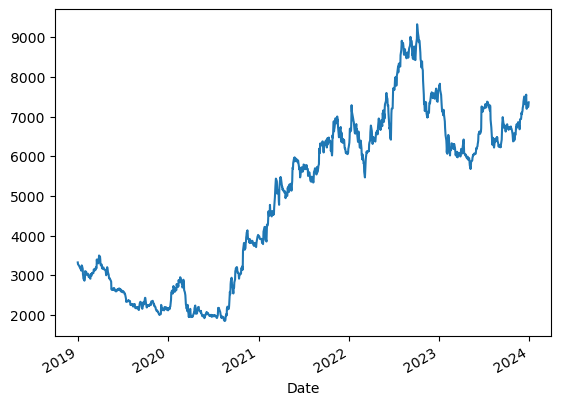

In [7]:
blue['price_t'].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

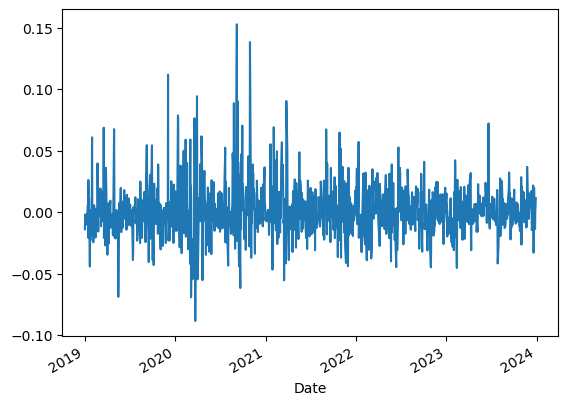

In [8]:
blue['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of Bluedart is in the downtrend in 2019 to 2020  and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [9]:
blue["mov_avg"] = blue["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

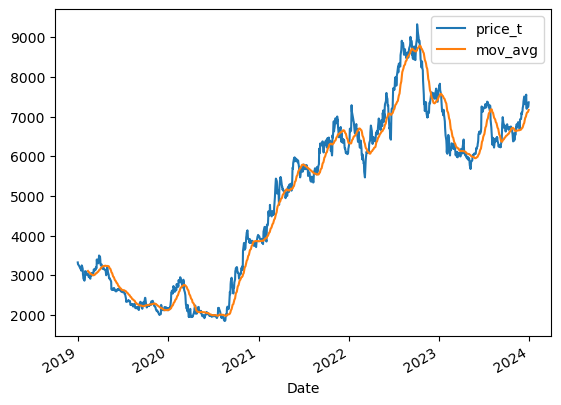

In [10]:
blue[["price_t", "mov_avg"]].plot()

### Volatility measure(30 days)

In [11]:
blue["Log_Ret"] = np.log(blue["price_t"] / blue["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

blue["volatility"] = blue["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

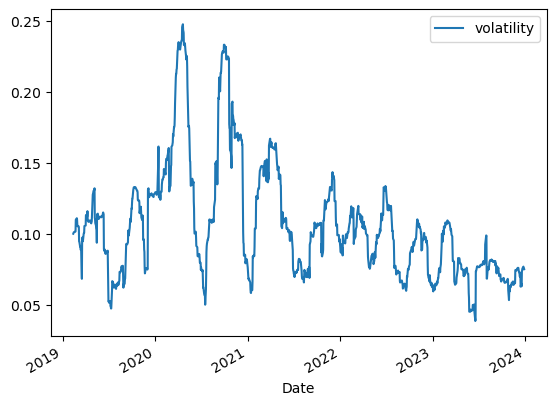

In [12]:
blue[["volatility"]].plot()

### RSI(30 DAYS)

In [13]:
change = blue["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



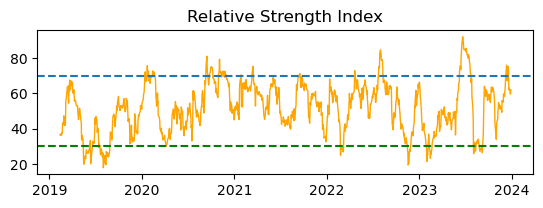

In [14]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

## CONCOR.NS

### Download the data

In [15]:
con = yf.download("CONCOR.NS", start="2019-01-01", end="2023-12-30")
con.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,552.000000,552.760010,543.559998,548.239990,509.331329,569838
2019-01-02,548.799988,551.280029,530.400024,535.159973,497.179535,1366171
2019-01-03,537.520020,538.320007,533.640015,536.000000,497.960022,840090
2019-01-04,536.559998,545.479980,534.559998,542.440002,503.942963,1084377
2019-01-07,545.479980,549.239990,540.440002,544.919983,506.246887,596906


### Cleaning Process

In [16]:
con.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [17]:
con.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,586.643127,595.426794,577.262290,585.830672,565.925562,1.782522e+06
std,119.400509,119.875231,118.798021,119.373659,123.278057,1.914890e+06
min,270.000000,287.899994,263.399994,279.350006,264.703125,0.000000e+00
25%,511.150009,518.174988,502.175003,511.500000,477.080032,8.301795e+05
50%,599.000000,608.599976,588.900024,598.000000,582.945007,1.260757e+06
75%,679.750000,688.000000,669.700012,679.175018,661.999115,2.060964e+06
max,879.000000,879.900024,857.500000,875.750000,875.750000,2.424633e+07


In [18]:
con.rename(columns={"Adj Close": "price_t"}, inplace=True)
con.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,552.000000,552.760010,543.559998,548.239990,509.331329,569838
2019-01-02,548.799988,551.280029,530.400024,535.159973,497.179535,1366171
2019-01-03,537.520020,538.320007,533.640015,536.000000,497.960022,840090
2019-01-04,536.559998,545.479980,534.559998,542.440002,503.942963,1084377
2019-01-07,545.479980,549.239990,540.440002,544.919983,506.246887,596906


### Calculate daily returns

In [19]:
con['daily_returns']=con["price_t"].pct_change()
con

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,552.000000,552.760010,543.559998,548.239990,509.331329,569838,NaN
2019-01-02,548.799988,551.280029,530.400024,535.159973,497.179535,1366171,-0.023858
2019-01-03,537.520020,538.320007,533.640015,536.000000,497.960022,840090,0.001570
2019-01-04,536.559998,545.479980,534.559998,542.440002,503.942963,1084377,0.012015
2019-01-07,545.479980,549.239990,540.440002,544.919983,506.246887,596906,0.004572
...,...,...,...,...,...,...,...
2023-12-22,835.950012,841.700012,824.250000,832.400024,832.400024,1541803,-0.008753
2023-12-26,835.000000,852.400024,831.000000,841.750000,841.750000,876297,0.011233
2023-12-27,841.750000,846.900024,833.049988,837.650024,837.650024,1122363,-0.004871


### Visualize the trend of stock price

<Axes: xlabel='Date'>

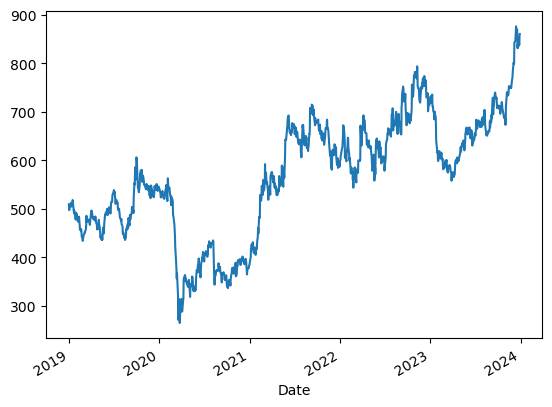

In [20]:
con['price_t'].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

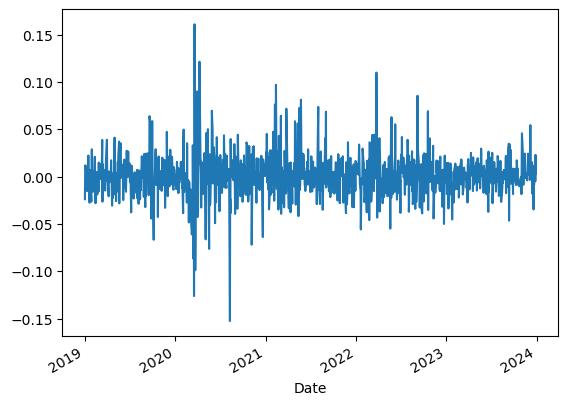

In [21]:
con['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of Concor is in the downtrend in early 2019 to 2021 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [22]:
con["mov_avg"] = con["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

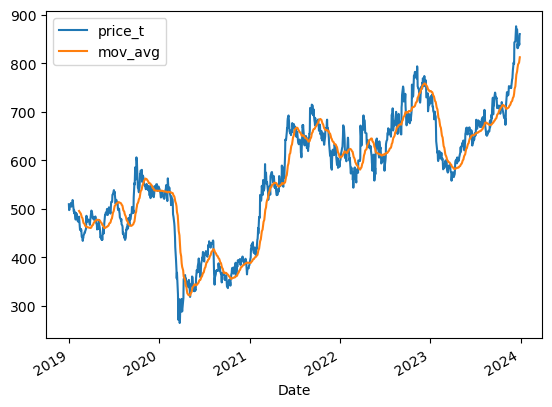

In [23]:
con[["price_t", "mov_avg"]].plot()

### Volatility measure(30 days)

In [24]:
con["Log_Ret"] = np.log(con["price_t"] / con["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

con["volatility"] = con["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

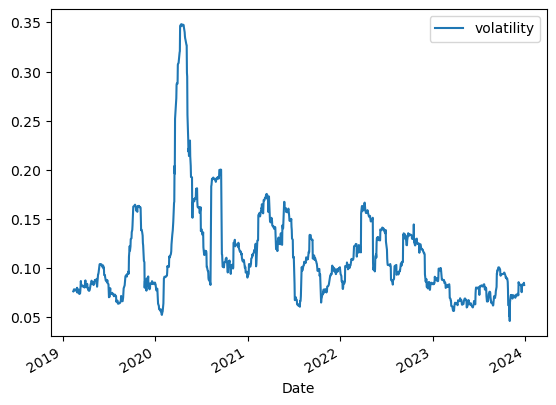

In [25]:
con[["volatility"]].plot()

### RSI(30 DAYS)

In [26]:
change = con["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



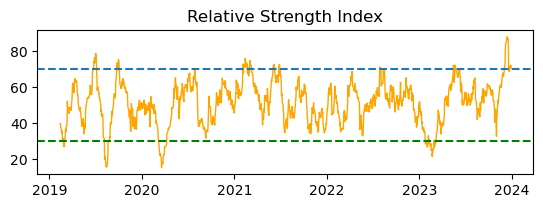

In [27]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

# DELHIVERY.NS

### Download the data

In [28]:
delh = yf.download("DELHIVERY.NS", start="2022-05-24", end="2023-12-30")
delh.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-24,495.200012,568.900024,467.500000,536.349976,536.349976,14210358
2022-05-25,543.799988,544.000000,500.299988,510.700012,510.700012,3810345
2022-05-26,508.000000,518.799988,495.000000,499.799988,499.799988,913963
2022-05-27,505.500000,547.299988,505.100006,541.549988,541.549988,1894346
2022-05-30,535.500000,541.549988,511.750000,521.250000,521.250000,898144


### Cleaning process

In [29]:
delh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 398 entries, 2022-05-24 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       398 non-null    float64
 1   High       398 non-null    float64
 2   Low        398 non-null    float64
 3   Close      398 non-null    float64
 4   Adj Close  398 non-null    float64
 5   Volume     398 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.8 KB


In [30]:
delh.describe()

,Open,High,Low,Close,Adj Close,Volume
count,398.000000,398.000000,398.000000,398.000000,398.000000,3.980000e+02
mean,423.322990,431.293217,414.637310,422.237438,422.237438,1.587129e+06
std,93.759244,96.864736,91.030828,93.598459,93.598459,2.587648e+06
min,298.450012,303.750000,291.000000,296.149994,296.149994,0.000000e+00
25%,352.000000,359.324997,345.349998,351.037506,351.037506,5.057410e+05
50%,399.024994,402.250000,390.324997,395.875000,395.875000,9.215570e+05
75%,490.775002,504.987503,466.587502,491.925003,491.925003,1.619106e+06
max,704.900024,708.000000,664.049988,699.200012,699.200012,2.257960e+07


In [31]:
delh.rename(columns={"Adj Close": "price_t"}, inplace=True)
delh.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2022-05-24,495.200012,568.900024,467.500000,536.349976,536.349976,14210358
2022-05-25,543.799988,544.000000,500.299988,510.700012,510.700012,3810345
2022-05-26,508.000000,518.799988,495.000000,499.799988,499.799988,913963
2022-05-27,505.500000,547.299988,505.100006,541.549988,541.549988,1894346
2022-05-30,535.500000,541.549988,511.750000,521.250000,521.250000,898144


### Calculate daily returns

In [32]:
delh['daily_returns']=delh["price_t"].pct_change()
delh

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2022-05-24,495.200012,568.900024,467.500000,536.349976,536.349976,14210358,NaN
2022-05-25,543.799988,544.000000,500.299988,510.700012,510.700012,3810345,-0.047823
2022-05-26,508.000000,518.799988,495.000000,499.799988,499.799988,913963,-0.021343
2022-05-27,505.500000,547.299988,505.100006,541.549988,541.549988,1894346,0.083533
2022-05-30,535.500000,541.549988,511.750000,521.250000,521.250000,898144,-0.037485
...,...,...,...,...,...,...,...
2023-12-22,391.000000,396.049988,384.049988,387.450012,387.450012,1878970,-0.001289
2023-12-26,390.000000,397.500000,386.100006,387.399994,387.399994,986342,-0.000129
2023-12-27,388.950012,390.350006,381.250000,383.350006,383.350006,734369,-0.010454


### Visualize the trend of stock price

<Axes: xlabel='Date'>

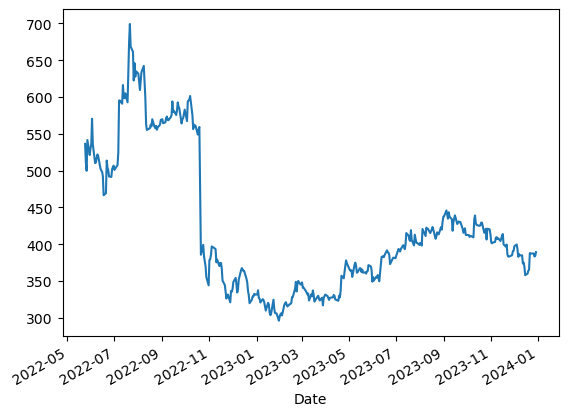

In [33]:
delh["price_t"].plot()

<Axes: xlabel='Date'>

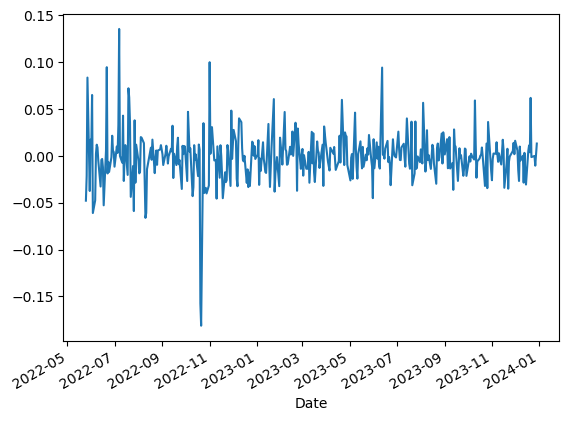

In [34]:
delh['daily_returns'].plot()

When we compare the trend of stock price and stock returns, we can observe that the stock price of Delhivery is in the hightrend in early 2020-05 to 2020-09 and later Decreased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [35]:
delh["mov_avg"] = delh["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

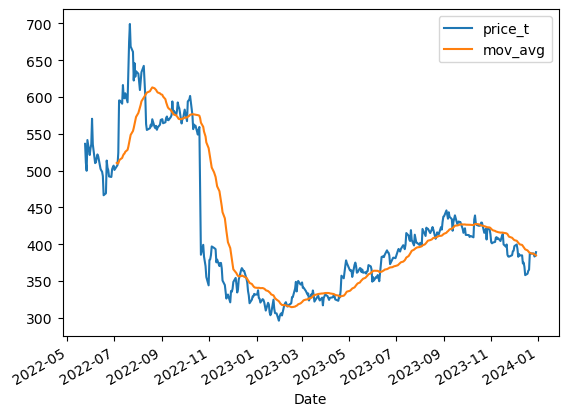

In [36]:
delh[["price_t", "mov_avg"]].plot()

### Volatility measure(30 days)

In [37]:
delh["Log_Ret"] = np.log(delh["price_t"] / delh["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

delh["volatility"] = delh["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

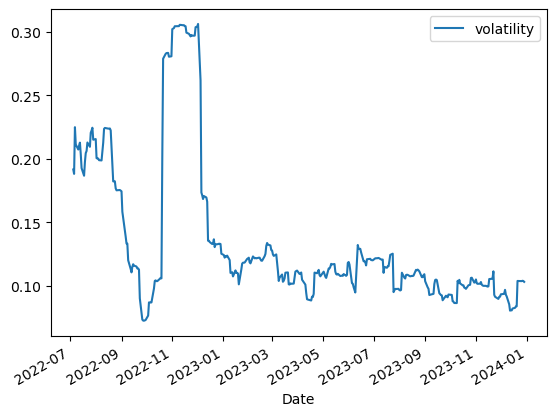

In [38]:
delh[["volatility"]].plot()

### RSI (30 DAYS)

In [39]:
change = delh["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



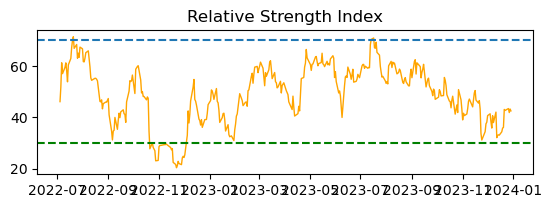

In [40]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

# GESHIP.NS

###  Download thee data

In [41]:
gesh = yf.download("GESHIP.NS", start="2019-01-01", end="2023-12-30")
gesh.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,315.799988,318.450012,313.500000,314.350006,263.677490,5539
2019-01-02,314.950012,333.000000,311.100006,319.950012,268.374847,100094
2019-01-03,318.000000,319.750000,315.950012,317.750000,266.529510,24060
2019-01-04,319.450012,322.500000,310.100006,319.450012,267.955444,29284
2019-01-07,319.500000,319.500000,308.350006,309.299988,259.441559,42004


In [42]:
gesh.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [43]:
gesh.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,408.638462,416.828381,400.954453,408.174291,379.257045,3.277336e+05
std,192.510170,196.090217,189.807222,192.671352,200.305248,4.693734e+05
min,172.000000,188.000000,162.000000,175.949997,154.876907,0.000000e+00
25%,271.975006,277.250000,266.625000,270.850006,234.797325,1.001825e+05
50%,318.250000,323.850006,311.950012,317.649994,288.973511,1.976320e+05
75%,537.674988,546.175018,526.325012,536.800018,508.249298,3.721980e+05
max,1021.000000,1042.300049,992.799988,1016.150024,1016.150024,6.590651e+06


In [44]:
gesh.rename(columns={"Adj Close": "price_t"}, inplace=True)
gesh.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,315.799988,318.450012,313.500000,314.350006,263.677490,5539
2019-01-02,314.950012,333.000000,311.100006,319.950012,268.374847,100094
2019-01-03,318.000000,319.750000,315.950012,317.750000,266.529510,24060
2019-01-04,319.450012,322.500000,310.100006,319.450012,267.955444,29284
2019-01-07,319.500000,319.500000,308.350006,309.299988,259.441559,42004


### Calculate daily reeturns

In [45]:
gesh['daily_returns']=gesh["price_t"].pct_change()
gesh

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,315.799988,318.450012,313.500000,314.350006,263.677490,5539,NaN
2019-01-02,314.950012,333.000000,311.100006,319.950012,268.374847,100094,0.017815
2019-01-03,318.000000,319.750000,315.950012,317.750000,266.529510,24060,-0.006876
2019-01-04,319.450012,322.500000,310.100006,319.450012,267.955444,29284,0.005350
2019-01-07,319.500000,319.500000,308.350006,309.299988,259.441559,42004,-0.031774
...,...,...,...,...,...,...,...
2023-12-22,997.750000,1042.300049,992.799988,1016.150024,1016.150024,967974,0.018442
2023-12-26,1021.000000,1039.000000,992.599976,996.599976,996.599976,649265,-0.019239
2023-12-27,1003.599976,1009.750000,975.099976,982.099976,982.099976,451217,-0.014549


### Visualize the trend of stock price

<Axes: xlabel='Date'>

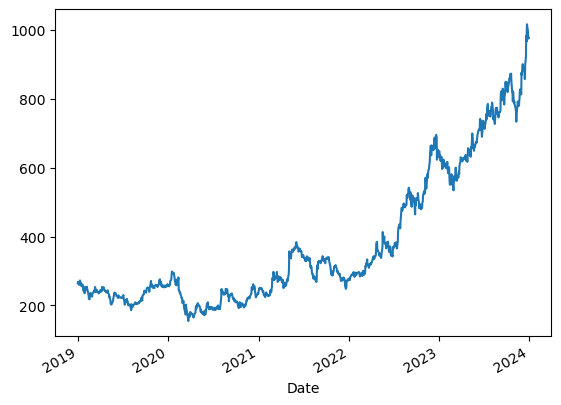

In [46]:
gesh["price_t"].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

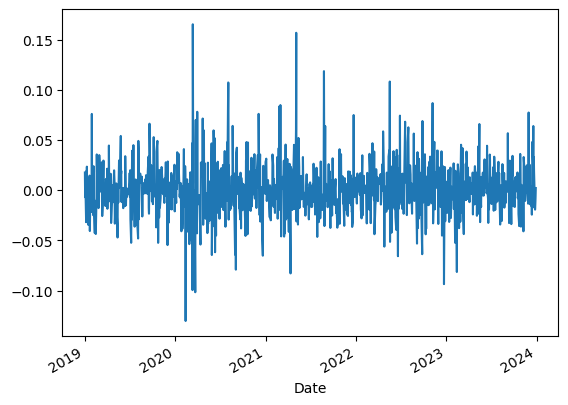

In [47]:
gesh['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of geship is in the downtrend to 2019 to 2020 and later increased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [48]:
gesh["mov_avg"] = gesh["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

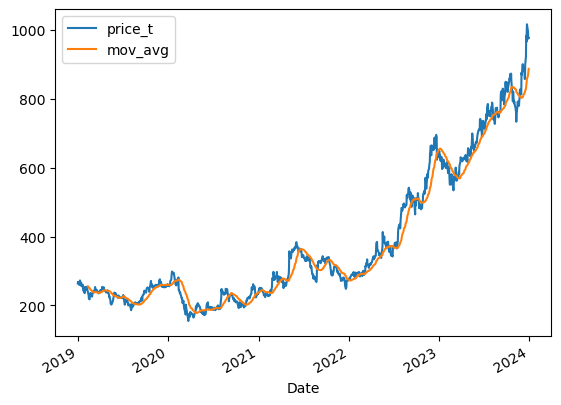

In [49]:
gesh[["price_t", "mov_avg"]].plot()

In [50]:
gesh["Log_Ret"] = np.log(gesh["price_t"] / gesh["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

gesh["volatility"] = gesh["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

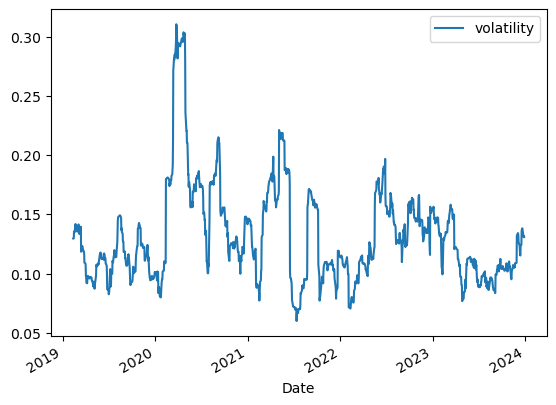

In [51]:
gesh[["volatility"]].plot()

### RSI(30 DAYS)

In [52]:
change = gesh["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)



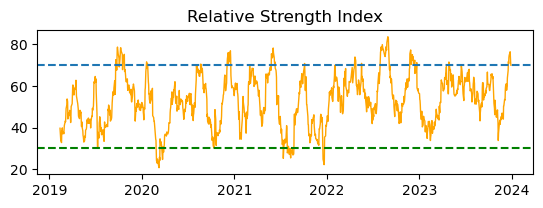

In [53]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

# TVSSCS.NS

### Download thee data

In [54]:
tvs = yf.download("TVSSCS.NS", start="2019-01-01", end="2023-12-30")
tvs.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-23,207.050003,208.600006,199.000000,201.000000,201.000000,24133600
2023-08-24,201.050003,202.899994,193.800003,199.100006,199.100006,2675099
2023-08-25,198.050003,198.300003,195.500000,197.050003,197.050003,946520
2023-08-28,198.949997,198.949997,195.100006,197.399994,197.399994,601097
2023-08-29,197.449997,201.850006,197.399994,200.000000,200.000000,1645512


In [55]:
tvs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87 entries, 2023-08-23 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       87 non-null     float64
 1   High       87 non-null     float64
 2   Low        87 non-null     float64
 3   Close      87 non-null     float64
 4   Adj Close  87 non-null     float64
 5   Volume     87 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [56]:
tvs.describe()

,Open,High,Low,Close,Adj Close,Volume
count,87.000000,87.000000,87.000000,87.000000,87.000000,8.700000e+01
mean,212.221264,214.967816,208.678162,210.996552,210.996552,1.679324e+06
std,9.531040,10.531296,7.930159,8.781852,8.781852,2.794447e+06
min,197.449997,198.300003,193.800003,197.050003,197.050003,3.065450e+05
25%,207.000000,208.750000,203.174995,205.974998,205.974998,6.716305e+05
50%,211.649994,214.300003,209.300003,210.949997,210.949997,9.408620e+05
75%,215.000000,218.324997,212.050003,214.349998,214.349998,1.517030e+06
max,253.000000,258.000000,242.000000,245.350006,245.350006,2.413360e+07


In [57]:
tvs.rename(columns={"Adj Close": "price_t"}, inplace=True)
tvs.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2023-08-23,207.050003,208.600006,199.000000,201.000000,201.000000,24133600
2023-08-24,201.050003,202.899994,193.800003,199.100006,199.100006,2675099
2023-08-25,198.050003,198.300003,195.500000,197.050003,197.050003,946520
2023-08-28,198.949997,198.949997,195.100006,197.399994,197.399994,601097
2023-08-29,197.449997,201.850006,197.399994,200.000000,200.000000,1645512


### Calculate daily reeturns

In [58]:
tvs['daily_returns']=tvs["price_t"].pct_change()
tvs

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2023-08-23,207.050003,208.600006,199.000000,201.000000,201.000000,24133600,NaN
2023-08-24,201.050003,202.899994,193.800003,199.100006,199.100006,2675099,-0.009453
2023-08-25,198.050003,198.300003,195.500000,197.050003,197.050003,946520,-0.010296
2023-08-28,198.949997,198.949997,195.100006,197.399994,197.399994,601097,0.001776
2023-08-29,197.449997,201.850006,197.399994,200.000000,200.000000,1645512,0.013171
...,...,...,...,...,...,...,...
2023-12-22,199.449997,202.600006,198.500000,199.000000,199.000000,1107867,0.001762
2023-12-26,199.000000,203.750000,199.000000,201.500000,201.500000,1377882,0.012563
2023-12-27,204.000000,204.000000,199.000000,199.399994,199.399994,758860,-0.010422


### Visualize the trend of stock price

<Axes: xlabel='Date'>

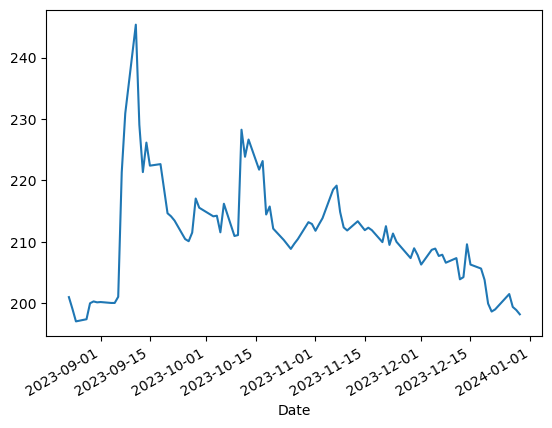

In [59]:
tvs["price_t"].plot()

### visualize the trend daily stock returns

<Axes: xlabel='Date'>

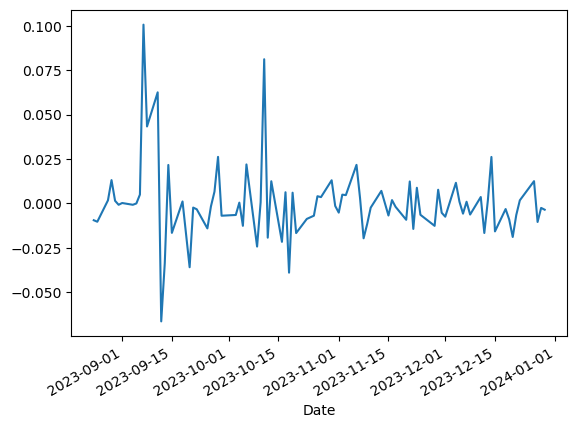

In [60]:
tvs['daily_returns'].plot()

When we compare the trend of stock price and stock returns, we can observe that the stock price of TVSSCS is in the hightrend in 2023-09-01 to 2023-09-15 and later decreased accordingly the stock returns behaves same. This means the stock returns are very much predictable.

### Moving Average 30 days

In [61]:
tvs["mov_avg"] = tvs["price_t"].rolling(30).mean()

<Axes: xlabel='Date'>

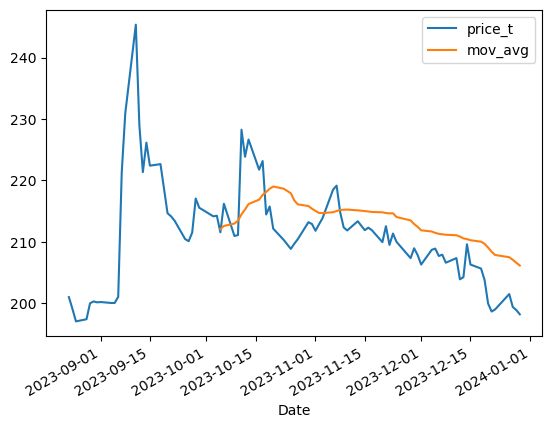

In [62]:
tvs[["price_t", "mov_avg"]].plot()

In [63]:
tvs["Log_Ret"] = np.log(tvs["price_t"] / tvs["price_t"].shift(1))

# compute volatility using the pandas rolling standard deviation function

tvs["volatility"] = tvs["Log_Ret"].rolling(window = 30).std()*np.sqrt(30)

<Axes: xlabel='Date'>

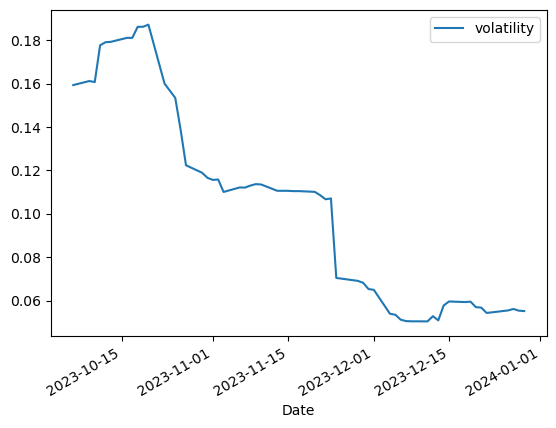

In [64]:
tvs[["volatility"]].plot()

### RSI (30 DAYS)

In [65]:
change = tvs["price_t"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)


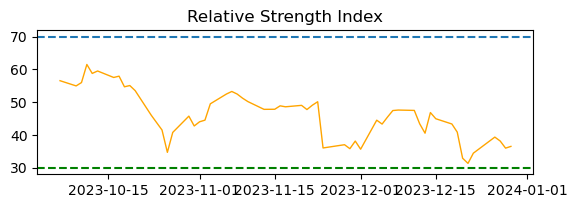

In [66]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5)

### Correlation matrix between stocks and Indices

In [67]:
## Correlation Matrix Between Stocks and Indices.

tkr = ['BLUEDART.NS','CONCOR.NS','DELHIVERY.NS','GESHIP.NS','TVSSCS.NS','^NSEI','^NSEBANK']
log = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')



[*********************100%%**********************]  7 of 7 completed


In [68]:
close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = log[i]['Adj Close']



### compute the correlation matrix

In [69]:
corr_matrix = close_prices.corr()
corr_matrix

,BLUEDART.NS,CONCOR.NS,DELHIVERY.NS,GESHIP.NS,TVSSCS.NS,^NSEI,^NSEBANK
BLUEDART.NS,1.000000,0.836063,0.719369,0.692076,-0.207517,0.913227,0.836743
CONCOR.NS,0.836063,1.000000,-0.001926,0.753997,-0.282440,0.882808,0.902531
DELHIVERY.NS,0.719369,-0.001926,1.000000,-0.505408,0.414294,-0.390336,-0.571774
GESHIP.NS,0.692076,0.753997,-0.505408,1.000000,-0.194134,0.819793,0.849203
TVSSCS.NS,-0.207517,-0.282440,0.414294,-0.194134,1.000000,-0.275203,-0.256416
^NSEI,0.913227,0.882808,-0.390336,0.819793,-0.275203,1.000000,0.951029
^NSEBANK,0.836743,0.902531,-0.571774,0.849203,-0.256416,0.951029,1.000000


### create a heatmap of the correlation matrix using Seaborn

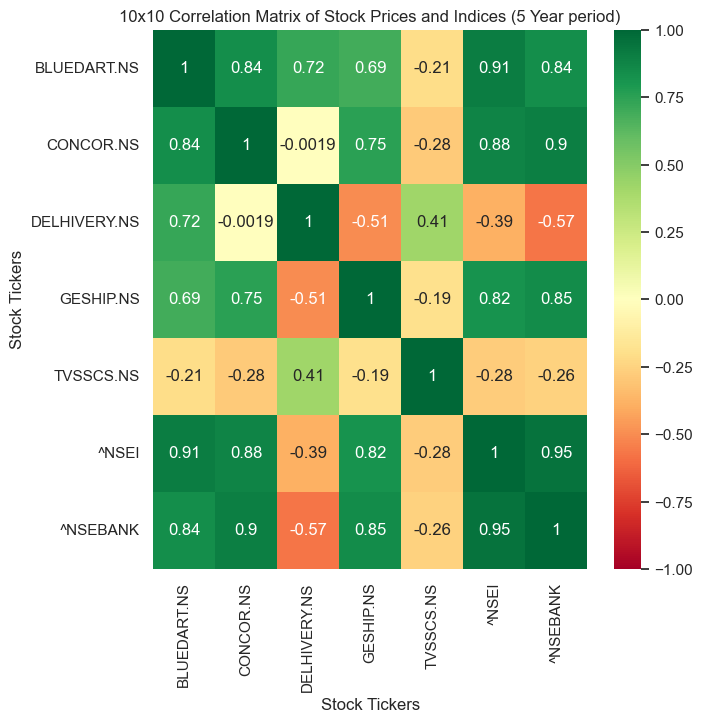

In [70]:
import seaborn as sns
sns.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

### Sector-wise Analysis

In [71]:
# Define a list of stock tickers representing each sector
tickers = ['BLUEDART.NS', 'CONCOR.NS', 'DELHIVERY.NS','GESHIP.NS','TVSSCS.NS']

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each stocks
data = get_stock_data(tickers)

# Check the retrieved data
print("Data:")
print(data.head())

# Continue with the rest of the analysis...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data:
            BLUEDART.NS   CONCOR.NS  DELHIVERY.NS   GESHIP.NS  TVSSCS.NS
Date                                                                    
2019-01-01  3322.916992  509.331329           NaN  263.677490        NaN
2019-01-02  3276.340088  497.179535           NaN  268.374847        NaN
2019-01-03  3269.477783  497.960022           NaN  266.529510        NaN
2019-01-04  3259.743408  503.942963           NaN  267.955444        NaN
2019-01-07  3231.953613  506.246887           NaN  259.441559        NaN


In [72]:
# Define a list of stock tickers representing each sector
tickers = ['BLUEDART.NS', 'CONCOR.NS', 'DELHIVERY.NS','GESHIP.NS','TVSSCS.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: GESHIP.NS, Laggard: DELHIVERY.NS


### Time Series Analysis

### Trend Analysis

### BLUEDART

[*********************100%%**********************]  1 of 1 completed


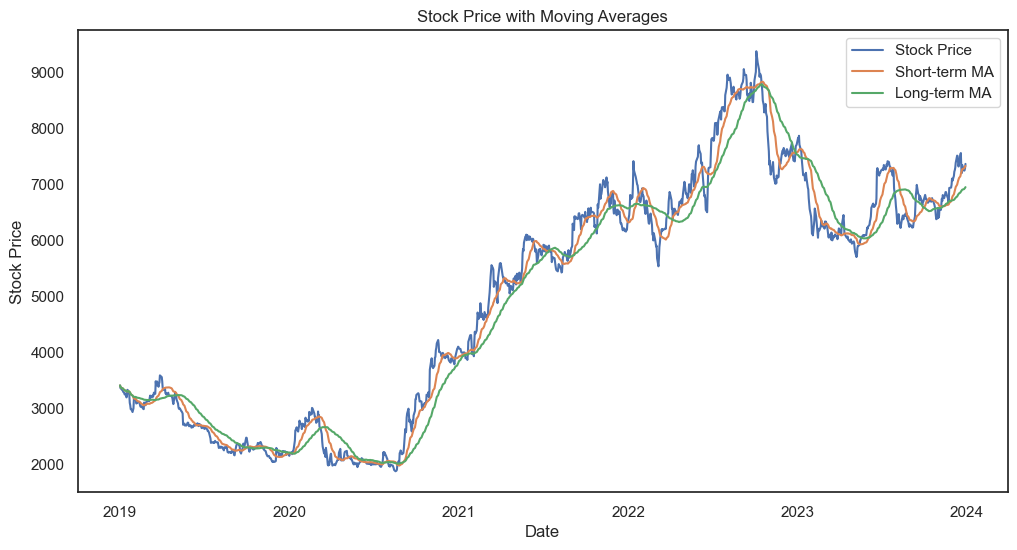

In [73]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'BLUEDART.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### CONCOR

[*********************100%%**********************]  1 of 1 completed


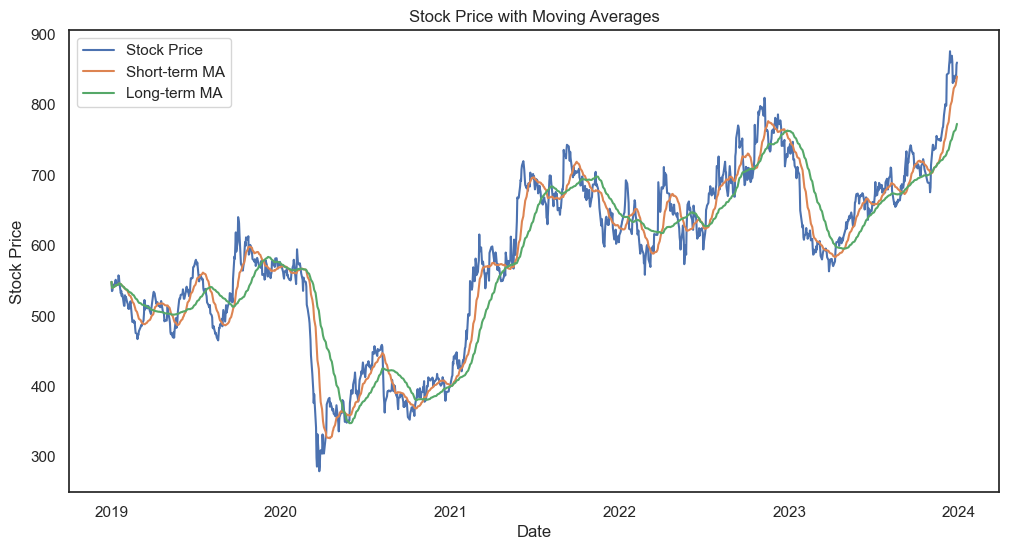

In [74]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'CONCOR.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### DELHIVERY

[*********************100%%**********************]  1 of 1 completed


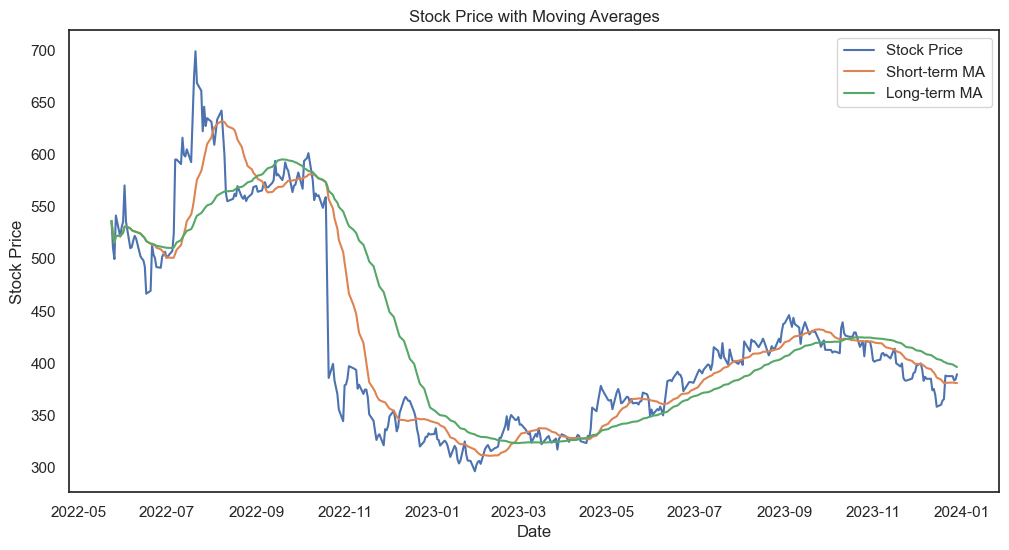

In [75]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'DELHIVERY.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### GESHIP

[*********************100%%**********************]  1 of 1 completed


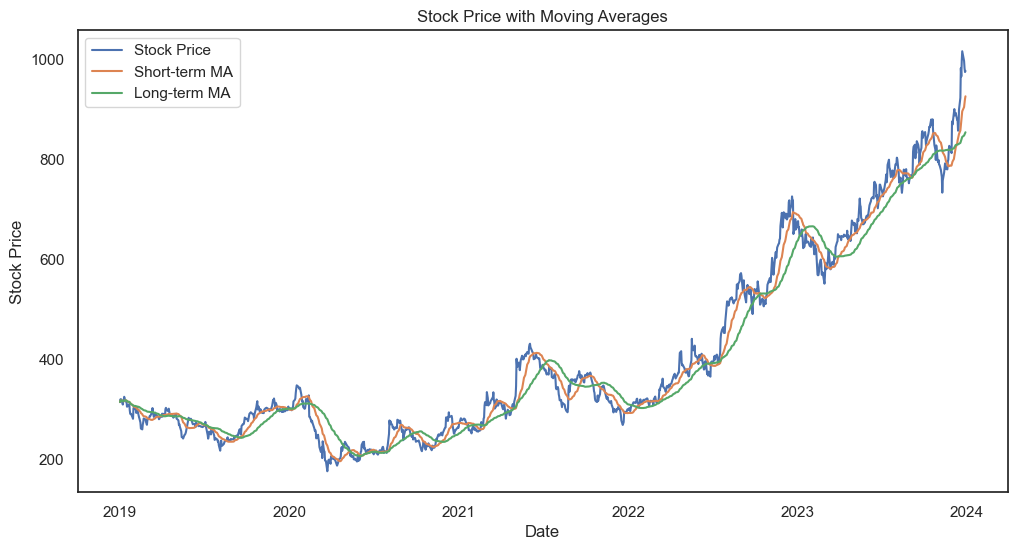

In [76]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'GESHIP.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### TVSSCS

[*********************100%%**********************]  1 of 1 completed


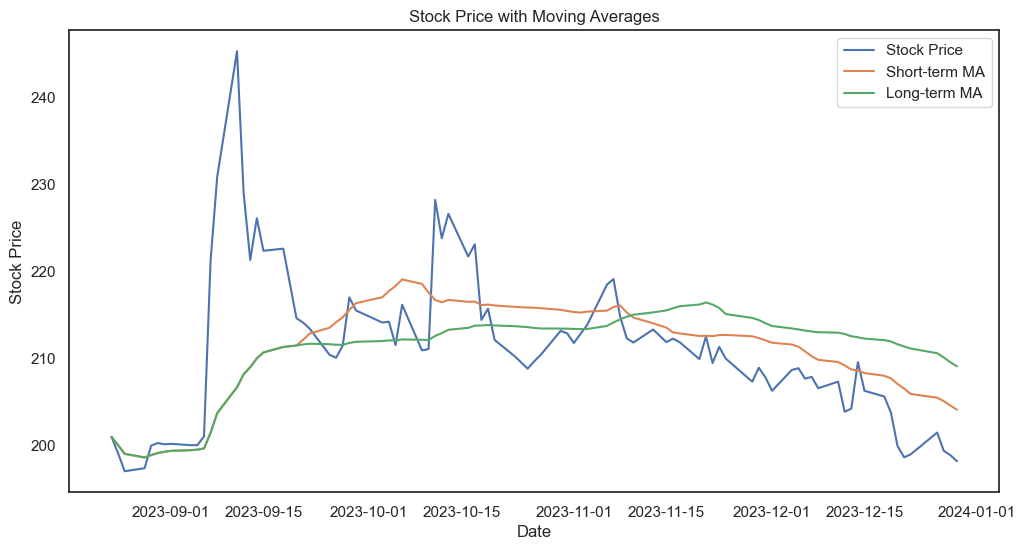

In [77]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'TVSSCS.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


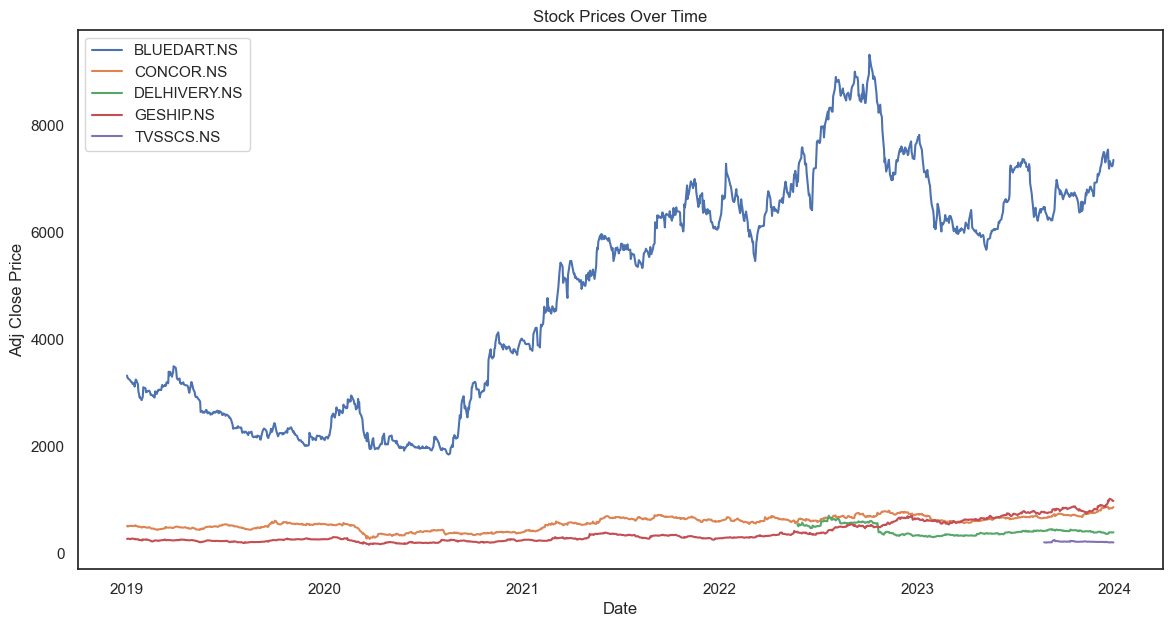

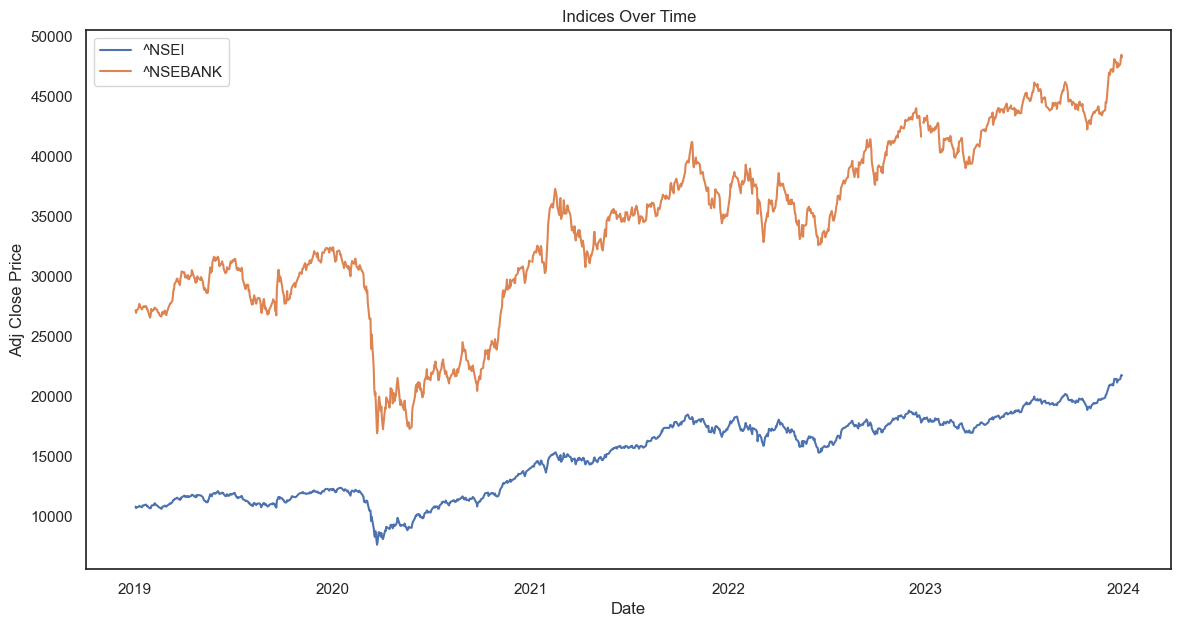

In [78]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['BLUEDART.NS', 'CONCOR.NS', 'DELHIVERY.NS','GESHIP.NS','TVSSCS.NS']  # Example stock symbols
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()
 # Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### Volatility Analysis

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


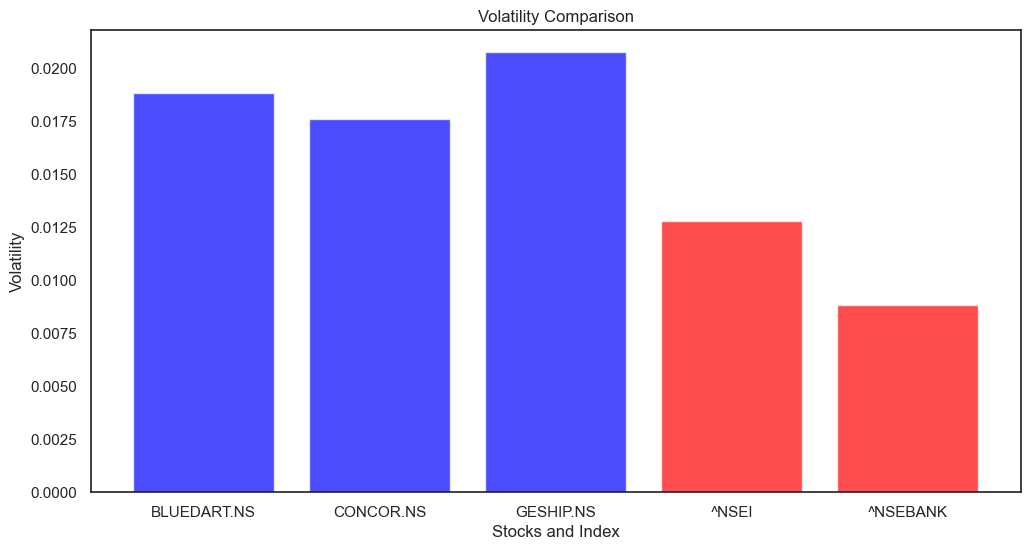

Stock Volatilities:
BLUEDART.NS    0.018827
CONCOR.NS      0.017581
GESHIP.NS      0.020736
dtype: float64

Index Volatility:
^NSEBANK    0.012766
^NSEI       0.008812
dtype: float64


In [94]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['BLUEDART.NS', 'CONCOR.NS','GESHIP.NS']
index_ticker = '^NSEI','^NSEBANK'  

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2019-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)

### Seasonal Patterns

### BLUEDART

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-01-01  3409.949951  3434.000000  3320.000000  3413.750000  3322.916992   
2019-01-02  3409.899902  3410.050049  3330.000000  3365.899902  3276.340088   
2019-01-03  3361.149902  3405.000000  3340.100098  3358.850098  3269.477783   
2019-01-04  3333.000000  3374.850098  3301.000000  3348.850098  3259.743408   
2019-01-07  3348.000000  3396.850098  3300.000000  3320.300049  3231.953613   

            Volume  
Date                
2019-01-01    3533  
2019-01-02    4900  
2019-01-03    1825  
2019-01-04    2599  
2019-01-07    2198  


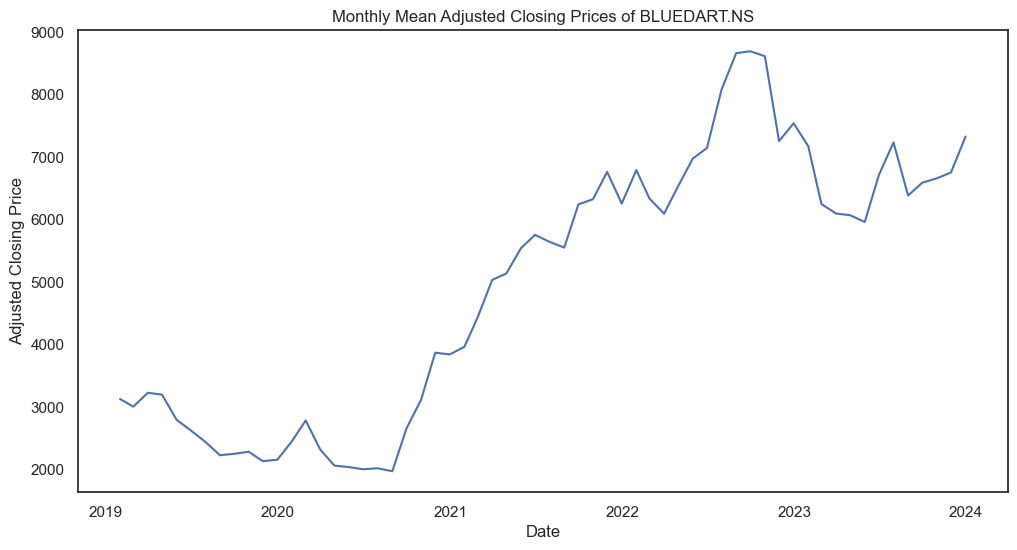

In [80]:
# Define the stock symbol and the time period
stock_symbol = "BLUEDART.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()


### CONCOR

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  552.000000  552.760010  543.559998  548.239990  509.331329   
2019-01-02  548.799988  551.280029  530.400024  535.159973  497.179535   
2019-01-03  537.520020  538.320007  533.640015  536.000000  497.960022   
2019-01-04  536.559998  545.479980  534.559998  542.440002  503.942963   
2019-01-07  545.479980  549.239990  540.440002  544.919983  506.246887   

             Volume  
Date                 
2019-01-01   569838  
2019-01-02  1366171  
2019-01-03   840090  
2019-01-04  1084377  
2019-01-07   596906  


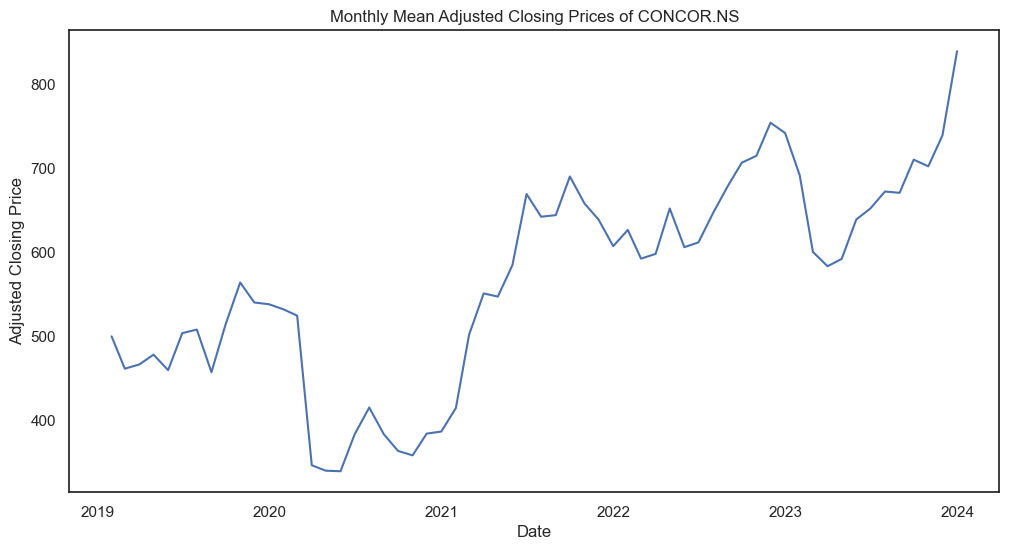

In [81]:
# Define the stock symbol and the time period
stock_symbol = "CONCOR.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()


### DELHIVERY

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-24  495.200012  568.900024  467.500000  536.349976  536.349976   
2022-05-25  543.799988  544.000000  500.299988  510.700012  510.700012   
2022-05-26  508.000000  518.799988  495.000000  499.799988  499.799988   
2022-05-27  505.500000  547.299988  505.100006  541.549988  541.549988   
2022-05-30  535.500000  541.549988  511.750000  521.250000  521.250000   

              Volume  
Date                  
2022-05-24  14210358  
2022-05-25   3810345  
2022-05-26    913963  
2022-05-27   1894346  
2022-05-30    898144  


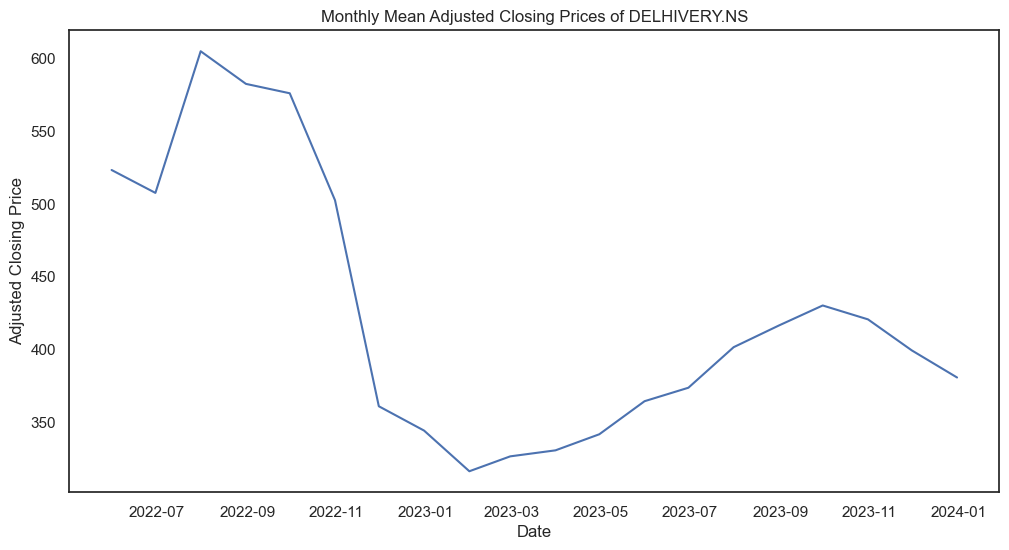

In [82]:
# Define the stock symbol and the time period
stock_symbol = "DELHIVERY.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()


### GESHIP

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-01-01  315.799988  318.450012  313.500000  314.350006  263.677490    5539
2019-01-02  314.950012  333.000000  311.100006  319.950012  268.374847  100094
2019-01-03  318.000000  319.750000  315.950012  317.750000  266.529510   24060
2019-01-04  319.450012  322.500000  310.100006  319.450012  267.955444   29284
2019-01-07  319.500000  319.500000  308.350006  309.299988  259.441559   42004


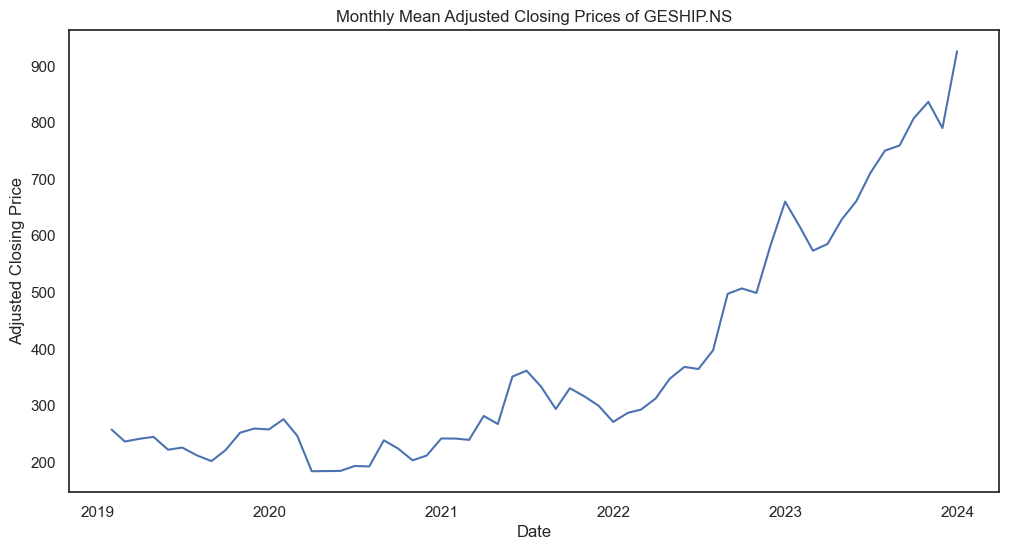

In [83]:
# Define the stock symbol and the time period
stock_symbol = "GESHIP.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()


### TVSSCS

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-23  207.050003  208.600006  199.000000  201.000000  201.000000   
2023-08-24  201.050003  202.899994  193.800003  199.100006  199.100006   
2023-08-25  198.050003  198.300003  195.500000  197.050003  197.050003   
2023-08-28  198.949997  198.949997  195.100006  197.399994  197.399994   
2023-08-29  197.449997  201.850006  197.399994  200.000000  200.000000   

              Volume  
Date                  
2023-08-23  24133600  
2023-08-24   2675099  
2023-08-25    946520  
2023-08-28    601097  
2023-08-29   1645512  


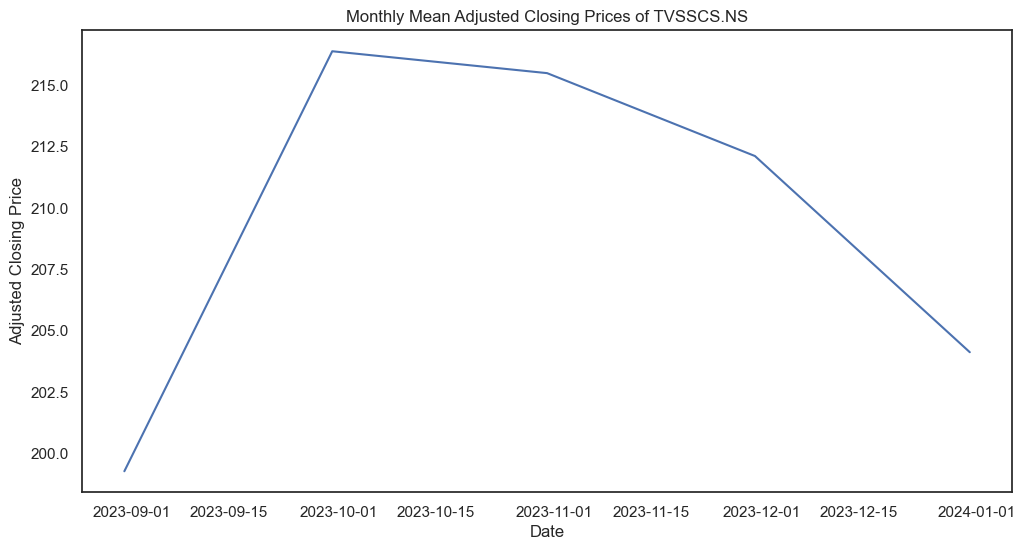

In [84]:
# Define the stock symbol and the time period
stock_symbol = "TVSSCS.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()


### Fundamental Analysis

In [85]:
# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(stock_data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(stock_tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)

Financial Ratios:
              Return on Equity (ROE)  Return on Assets (ROA)  \
BLUEDART.NS                      NaN                0.000003   
CONCOR.NS                        NaN                0.000029   
DELHIVERY.NS                     NaN                0.000039   
GESHIP.NS                        NaN                0.000044   
TVSSCS.NS                        NaN                0.000079   

              Debt to Equity Ratio  
BLUEDART.NS               0.000693  
CONCOR.NS                 0.007993  
DELHIVERY.NS             -0.019035  
GESHIP.NS                 0.003926  
TVSSCS.NS                -1.000000  


In [86]:
# List of stock tickers for the companies you want to analyze
sector_tickers = {'Logistics':  ['BLUEDART.NS', 'CONCOR.NS', 'DELHIVERY.NS','GESHIP.NS','TVSSCS.NS'], 'Manufacturing': ['GRINDWELL.NS', 'TEXRAIL.NS', 'TITAGARH.NS','WENDT.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios
# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison

    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(stock_tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)

Comparison of Ratios:
           BLUEDART.NS  CONCOR.NS  DELHIVERY.NS  GESHIP.NS  TVSSCS.NS  \
Open         -0.023781  -0.023781     -0.023781  -0.023781  -0.023781   
High         -0.043787  -0.043787     -0.043787  -0.043787  -0.043787   
Low           0.040349   0.040349      0.040349   0.040349   0.040349   
Close         0.016596   0.016596      0.016596   0.016596   0.016596   
Adj Close     0.016596   0.016596      0.016596   0.016596   0.016596   
Volume       75.114783  75.114783     75.114783  75.114783  75.114783   

              Logistics  Manufacturing  
Open      -9.543917e-01  -9.543917e-01  
High      -1.020618e+00  -1.020618e+00  
Low       -1.055340e-01  -1.055340e-01  
Close     -3.277753e-01  -3.277753e-01  
Adj Close -3.277753e-01  -3.277753e-01  
Volume    -2.818593e+06  -2.818593e+06  
